In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [19]:
TINY_SIZE = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
sns.set(style="darkgrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": BIGGER_SIZE,
    "axes.labelsize": MEDIUM_SIZE,
    "axes.titlesize": BIGGER_SIZE,
    "xtick.labelsize": TINY_SIZE, 
    "ytick.labelsize": TINY_SIZE, 
    "legend.fontsize": TINY_SIZE, 
    "figure.titlesize": BIGGER_SIZE, 
})

In [20]:
def load_data(paths: list):
    aggregated_df = pd.DataFrame()
    for path in paths:
        # Read run data
        df = pd.read_csv(path)

        df["action"] = df["action"].map(lambda x: 10**x)

        aggregated_df = pd.concat([aggregated_df, df], ignore_index=True)
    return aggregated_df

In [21]:
data_exp_0 = pd.read_csv("../data_teachers/ToySGD/exponential_decay/0/Rosenbrock/aggregated_run_data.csv")
data_step_0 = pd.read_csv("../data_teachers/ToySGD/step_decay/0/Rosenbrock/aggregated_run_data.csv")
data_sgdr_0 = pd.read_csv("../data_teachers/ToySGD/sgdr/0/Rosenbrock/aggregated_run_data.csv")
data_const_0 = pd.read_csv("../data_teachers/ToySGD/constant/0/Rosenbrock/aggregated_run_data.csv")
dir_path = Path("../data_single_64/ToySGD/exponential_decay/0/Rosenbrock/")

run_data_path = []
for path in (Path(dir_path) / "results" / "td3_bc").rglob(
            "*/eval_data.csv",
        ):
    run_data_path.append(path)

data_agent = load_data(run_data_path)

# only use single completed run for step
completed_runs_ids = data_step_0[data_step_0["batch"] == 100][
                    "run"
                ].unique()
completed_runs = data_step_0[
    data_step_0["run"].isin(completed_runs_ids)
]
single_teacher_run = completed_runs[
    completed_runs["run"] == completed_runs_ids[0]
]
data_step_0 = single_teacher_run

data_all = [data_const_0, data_exp_0, data_sgdr_0, data_step_0]
data_labels = ["Constant", "Exponential Decay", "SGDR", "Step Decay", "Learned Schedule"]

for data in data_all:
    data["action"] = data["action"].map(lambda x: 10**x)

data_all.append(data_agent)

/tmp/ipykernel_7686/2069239167.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["action"] = data["action"].map(lambda x: 10**x)


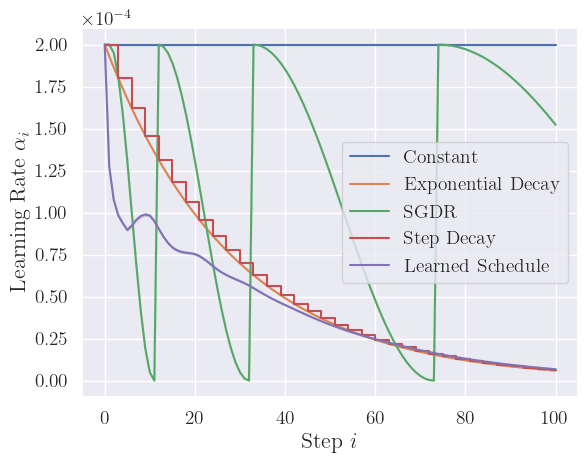

In [22]:
# Create heterogeneous plot:
for label, data in zip(data_labels, data_all):
    drawstyle = "steps-post" if label == "Step Decay" else "default"
    ax = sns.lineplot(
            data=data,
            x="batch",
            y="action",
            drawstyle=drawstyle,
            label=label,
        )
ax.set_xlabel("Step $i$")
ax.set_ylabel("Learning Rate $\\alpha_i$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
save_path = Path("figures")
save_path.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path / "all_default.pdf", bbox_inches="tight")
plt.show()